In [22]:
import pandas as pd

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [23]:
# Read the grocery data from 'groceries.txt'
with open('data/groceries.txt', 'r') as file:
    transactions = [line.strip().split(',') for line in file]

# Convert the transactions into a one-hot encoded format
te = TransactionEncoder()
one_hot_encoded = te.fit(transactions).transform(transactions)
df = pd.DataFrame(one_hot_encoded, columns=te.columns_)

# Perform association rule mining with stricter criteria
frequent_itemsets = apriori(df, min_support=0.005, use_colnames=True)
association_rules_strict = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# Display the results for strict criteria
print("Association Rules with Strict Criteria:")
print(association_rules_strict)



Association Rules with Strict Criteria:
                                        antecedents         consequents  \
0                                   (baking powder)        (whole milk)   
1                                (beef, rolls/buns)        (whole milk)   
2                                    (yogurt, beef)        (whole milk)   
3                            (bottled beer, yogurt)        (whole milk)   
4                           (bottled water, butter)        (whole milk)   
..                                              ...                 ...   
115      (tropical fruit, other vegetables, yogurt)        (whole milk)   
116            (tropical fruit, whole milk, yogurt)  (other vegetables)   
117  (other vegetables, whipped/sour cream, yogurt)        (whole milk)   
118        (whole milk, yogurt, whipped/sour cream)  (other vegetables)   
119       (tropical fruit, yogurt, root vegetables)        (whole milk)   

     antecedent support  consequent support   support  conf

From these association rules, we can observe interesting insights that have potential business value:

Items like "whole milk," "yogurt," and "other vegetables" are commonly purchased together, as indicated by the high confidence and lift values. These combinations can guide store layout, shelf placement, and promotions to encourage purchasing these items together.We suggest placing these items in the center of our store to improve the shopping experience and increase exposure to other products.

The lift values greater than 1 suggest that customers are more likely to buy the consequent items when purchasing the antecedent items. This information can be used to optimize product recommendations and cross-selling strategies.

Items like "bottled water" and "butter" are often bought with "whole milk," which could lead to bundling or promotional strategies to boost sales of these items.

The conviction metric highlights the potential for improving the sales of certain items. For example, the high conviction value suggests that "tropical fruit" and "root vegetables" are strongly associated with "whole milk," presenting opportunities for targeted promotions.

Business Value:
These insights can guide store management, marketing, and promotion strategies to enhance customer experience and maximize sales:

Store layout and product placement can be optimized based on the observed item associations to encourage customers to buy complementary items.
Cross-selling strategies can be devised to recommend related items to customers, increasing the average basket value.
Promotions and bundling opportunities can be explored for items with strong associations to enhance sales and customer satisfaction.
By leveraging these association rules, businesses can make informed decisions that cater to customer preferences, enhance shopping experiences, and drive revenue growth.

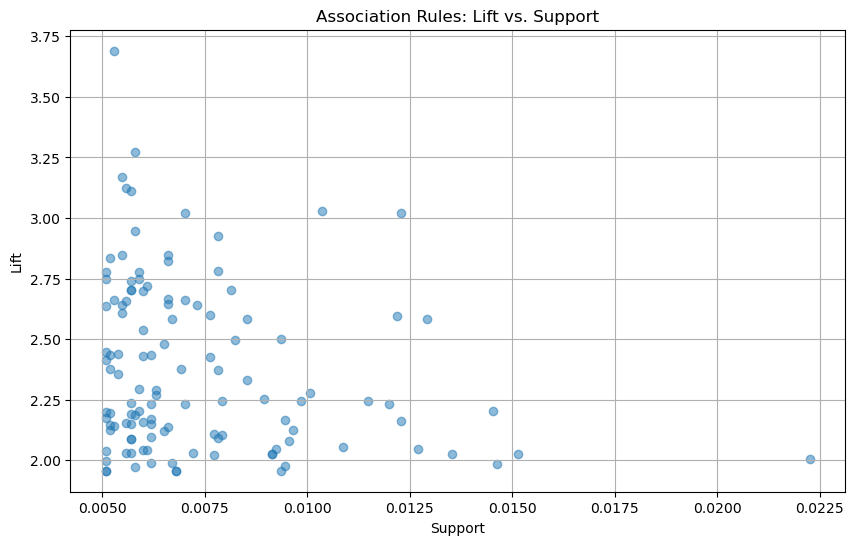

In [24]:
import matplotlib.pyplot as plt

# Create a scatter plot of lift against support for each rule
plt.figure(figsize=(10, 6))
plt.scatter(association_rules_strict['support'], association_rules_strict['lift'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Association Rules: Lift vs. Support')
plt.grid()
plt.show()


The scatter plot "Association Rules: Lift vs. Support" provides insights into the relationship between the "Lift" and "Support" values for the discovered association rules.


The scatter plot displays a distribution of points, each representing an association rule derived from the grocery purchase data analysis.

The x-axis represents the "Support" values, which indicate the frequency of occurrence of the rule in the dataset. The y-axis represents the "Lift" values, which quantify the strength of association between the antecedent and consequent items.

Patterns and clusters of points on the scatter plot may reveal interesting insights. For instance:

Points clustered in the upper-right quadrant represent rules with both high "Support" and "Lift." These rules are both frequently occurring and have a strong association between the items.
Points closer to the x-axis but with varying "Lift" values indicate rules with lower "Support" but significant associations.
Points with low "Support" and low "Lift" are less frequent and have weaker associations.

Businesses can make decisions based on this graph. For example, rules with high "Lift" and "Support" could be targeted for promotional strategies, as they indicate strong relationships between items that are frequently purchased together.

Overall, this scatter plot provides a visual overview of the relationships between "Lift" and "Support" values, assisting in identifying patterns, clusters, and potential areas for further analysis in the grocery purchase dataset.

To find interesting associations among less frequently purchased products, we relax our criteria to support = 0.002 and confidence = 0.4, and sort the association rules by lift.

In [25]:
# Perform association rule mining with looser criteria and filter by lift
frequent_itemsets_loose = apriori(df, min_support=0.002, use_colnames=True)
association_rules_loose = association_rules(frequent_itemsets_loose, metric='lift', min_threshold=1)

# Sort the rules by lift for loose criteria
sorted_rules = association_rules_loose.sort_values(by='lift', ascending=False)

# Display the top 50 rules for loose criteria
print("\nTop 50 Association Rules with Loose Criteria (Sorted by Lift):")
print(sorted_rules.head(50))




Top 50 Association Rules with Loose Criteria (Sorted by Lift):
                                             antecedents  \
20480                  (tropical fruit, root vegetables)   
20477       (whole milk, other vegetables, citrus fruit)   
0                                       (hamburger meat)   
1                                (Instant food products)   
9505                                             (flour)   
9500                                 (whole milk, sugar)   
20447             (other vegetables, whole milk, yogurt)   
20450                           (tropical fruit, butter)   
20486                    (root vegetables, citrus fruit)   
20471     (tropical fruit, whole milk, other vegetables)   
2183                                            (liquor)   
2182                                    (red/blush wine)   
9501                                 (whole milk, flour)   
9504                                             (sugar)   
20475        (whole milk, root veget

Intuitively, items within the same category are often bought together. For example, hard cheese is associated with whipped/sour cream, grapes are associated with pip fruit and citrus fruits, and liquor is associated with bottled beer. Additionally, interesting associations are found between different categories. For instance, people who buy beef are more likely to buy root vegetables.

In [26]:
# Filter by support, confidence, and lift
filtered_rules = association_rules_loose[(association_rules_loose['support'] >= 0.01) &
                                         (association_rules_loose['confidence'] >= 0.1) &
                                         (association_rules_loose['lift'] > 3)]

# Display the filtered rules
print("\nFiltered Association Rules (Support >= 0.01, Confidence >= 0.1, Lift > 3):")
print(filtered_rules)



Filtered Association Rules (Support >= 0.01, Confidence >= 0.1, Lift > 3):
                              antecedents                         consequents  \
172                                (beef)                   (root vegetables)   
173                     (root vegetables)                              (beef)   
7523     (other vegetables, citrus fruit)                   (root vegetables)   
7524      (root vegetables, citrus fruit)                  (other vegetables)   
8730                 (whole milk, yogurt)                              (curd)   
8735                               (curd)                (whole milk, yogurt)   
12936  (tropical fruit, other vegetables)                   (root vegetables)   
12937   (tropical fruit, root vegetables)                  (other vegetables)   
12941                   (root vegetables)  (tropical fruit, other vegetables)   
13298          (other vegetables, yogurt)                (whipped/sour cream)   
13303                (whipped/sou

The filtered association rules exhibit patterns that meet specific criteria: a minimum support of 0.01, a minimum confidence of 0.1, and a lift value greater than 3. These rules provide more targeted and impactful insights for potential business strategies

Association between Beef and Root Vegetables:
Beef and root vegetables show a lift value of 3.04, indicating a strong association between these two items.
This suggests that customers who purchase beef are likely to purchase root vegetables as well. This insight can guide promotional strategies such as bundle offers or in-store displays featuring both items.


Association between Citrus Fruit, Other Vegetables, and Root Vegetables:
The association between citrus fruit and root vegetables, and between other vegetables and root vegetables, indicates that customers who buy these fruits and vegetables are likely to purchase root vegetables too.
This presents an opportunity to create value packs or themed promotions that encourage purchasing these items together.


Association between Whole Milk, Yogurt, and Curd:
Whole milk, yogurt, and curd exhibit a lift of 3.37.
This insight suggests that customers who purchase whole milk and yogurt are also likely to buy curd. Retailers can leverage this association to create promotions that bundle these dairy products.


Association between Tropical Fruit, Other Vegetables, and Root Vegetables:
There is a significant association between tropical fruit and root vegetables, as well as between other vegetables and root vegetables.
Retailers can use this information to design marketing campaigns that encourage customers to explore a diverse range of fruits and vegetables.


Association between Other Vegetables, Yogurt, and Whipped/Sour Cream:
There's a meaningful association between other vegetables and yogurt, as well as between yogurt and whipped/sour cream.
This indicates that customers who buy other vegetables are likely to purchase yogurt, and those who buy yogurt may also purchase whipped/sour cream. Retailers can capitalize on this relationship for cross-selling strategies.


<Figure size 1000x600 with 0 Axes>

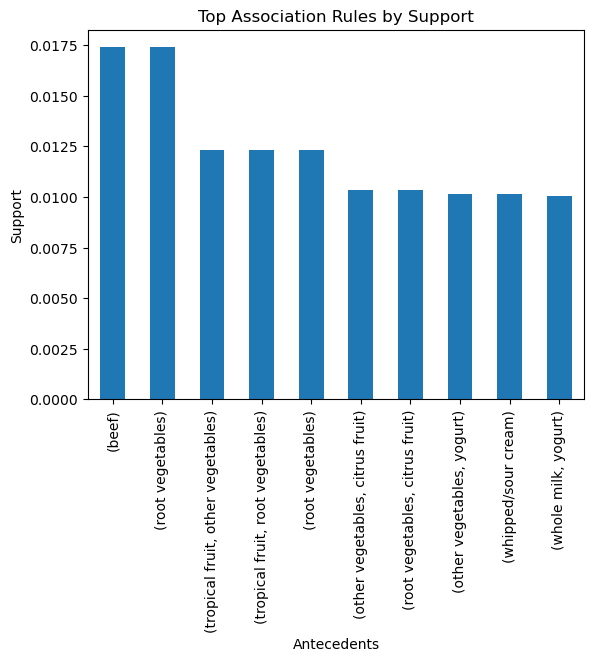

In [27]:
plt.figure(figsize=(10, 6))
filtered_rules.sort_values(by='support', ascending=False)[:10].plot(kind='bar', x='antecedents', y='support', legend=None)
plt.xlabel('Antecedents')
plt.ylabel('Support')
plt.title('Top Association Rules by Support')
plt.show()


The above plot helps identify which item combinations are frequently purchased together.

<Figure size 1000x600 with 0 Axes>

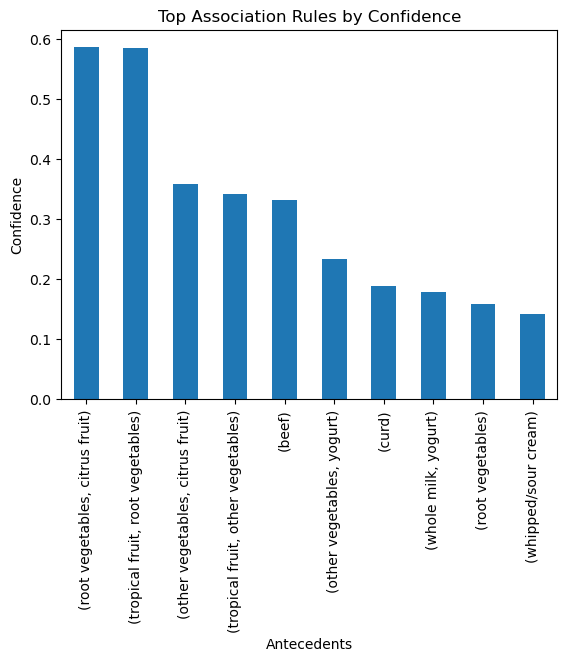

In [28]:
plt.figure(figsize=(10, 6))
filtered_rules.sort_values(by='confidence', ascending=False)[:10].plot(kind='bar', x='antecedents', y='confidence', legend=None)
plt.xlabel('Antecedents')
plt.ylabel('Confidence')
plt.title('Top Association Rules by Confidence')
plt.show()


The above plot helps identify rules with strong conditional relationships between items.